In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Tourism (1).xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using Logistic Regression,Decision Tree,Random
Forest,AdaBoost,Gradient Boosting,XGBoost and Stacking,I
created a model for a Tourism company to predict if a customer
takes the tour package or not with XGBoost being the best model
with the highest accuracy.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import scipy.stats
from statistics import mode
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

Q1)A)

In [ ]:
df=pd.read_excel(path)
print(df.head())

   CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe          

Q1)B)

In [ ]:
print(df.shape)

(4888, 20)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
print(df.isnull().sum())

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64


Q1)C)

In [ ]:
new_df=df.groupby('Designation')
print(new_df.first())

                CustomerID  ProdTaken   Age    TypeofContact  CityTier  \
Designation                                                              
AVP                 200018          0  53.0     Self Enquiry         3   
Executive           200002          1  37.0     Self Enquiry         1   
Manager             200000          1  41.0     Self Enquiry         3   
Senior Manager      200008          0  38.0  Company Invited         1   
VP                  200025          0  53.0     Self Enquiry         1   

                DurationOfPitch   Occupation  Gender  NumberOfPersonVisiting  \
Designation                                                                    
AVP                         8.0     Salaried  Female                       3   
Executive                   8.0  Free Lancer    Male                       3   
Manager                     6.0     Salaried  Female                       3   
Senior Manager             29.0     Salaried    Male                       2   
V

In [ ]:
print(new_df.mean()['MonthlyIncome'])

Designation
AVP               32241.046784
Executive         19939.922507
Manager           22643.157629
Senior Manager    26637.749326
VP                35878.947826
Name: MonthlyIncome, dtype: float64


<ipython-input-190-77ab947effc4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(new_df.mean()['MonthlyIncome'])


Q1)D)

In [ ]:
series=df.isnull().sum()
series=series.apply(lambda x:(x/df.shape[0])*100)
print(series)

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         4.623568
TypeofContact               0.511457
CityTier                    0.000000
DurationOfPitch             5.135025
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.920622
ProductPitched              0.000000
PreferredPropertyStar       0.531915
MaritalStatus               0.000000
NumberOfTrips               2.864157
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.350245
Designation                 0.000000
MonthlyIncome               4.766776
dtype: float64


Q1)E)

In [ ]:
for i in df.columns:
  print(i," ",len(df[i].unique()))

CustomerID   4888
ProdTaken   2
Age   45
TypeofContact   3
CityTier   3
DurationOfPitch   35
Occupation   4
Gender   3
NumberOfPersonVisiting   5
NumberOfFollowups   7
ProductPitched   5
PreferredPropertyStar   4
MaritalStatus   4
NumberOfTrips   13
Passport   2
PitchSatisfactionScore   5
OwnCar   2
NumberOfChildrenVisiting   5
Designation   5
MonthlyIncome   2476


Q1)F)

In [ ]:
df=df.drop('CustomerID',axis=1)
print(df.head())

   ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0          1  41.0     Self Enquiry         3              6.0   
1          0  49.0  Company Invited         1             14.0   
2          1  37.0     Self Enquiry         1              8.0   
3          0  33.0  Company Invited         1              9.0   
4          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe          

Q1)G)

In [ ]:
print(df.describe())

         ProdTaken          Age     CityTier  DurationOfPitch  \
count  4888.000000  4662.000000  4888.000000      4637.000000   
mean      0.188216    37.622265     1.654255        15.490835   
std       0.390925     9.316387     0.916583         8.519643   
min       0.000000    18.000000     1.000000         5.000000   
25%       0.000000    31.000000     1.000000         9.000000   
50%       0.000000    36.000000     1.000000        13.000000   
75%       0.000000    44.000000     3.000000        20.000000   
max       1.000000    61.000000     3.000000       127.000000   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count             4888.000000        4843.000000            4862.000000   
mean                 2.905074           3.708445               3.581037   
std                  0.724891           1.002509               0.798009   
min                  1.000000           1.000000               3.000000   
25%                  2.000000          

Q1)H)

In [ ]:
df_categorical=df.select_dtypes(exclude='number')
for i in df_categorical.columns:
  print(i," ",len(df_categorical[i].unique()))

TypeofContact   3
Occupation   4
Gender   3
ProductPitched   5
MaritalStatus   4
Designation   5


In [ ]:
for i in df_categorical.columns:
  print(df_categorical[i].value_counts())

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


Q1)I

In [ ]:
print(df_categorical.isnull().sum())

TypeofContact     25
Occupation         0
Gender             0
ProductPitched     0
MaritalStatus      0
Designation        0
dtype: int64


In [ ]:
print(df_categorical['TypeofContact'].value_counts())
print(mode(df_categorical['TypeofContact']))

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
Self Enquiry


In [ ]:
df_categorical['TypeofContact']=df_categorical['TypeofContact'].fillna(mode(df_categorical['TypeofContact']))
print(df_categorical.isnull().sum())

TypeofContact     0
Occupation        0
Gender            0
ProductPitched    0
MaritalStatus     0
Designation       0
dtype: int64


Q1)J)

In [ ]:
df_categorical=df_categorical.astype('category')
for i in df.columns:
  if df[i].dtype=='object':
    df=df.drop(i,axis=1)
df=pd.concat([df,df_categorical],axis=1)

Q2)A)

In [ ]:
df_copy=df.copy()

Q2)B)

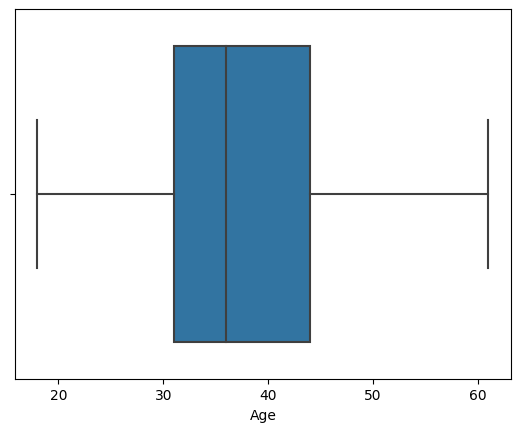

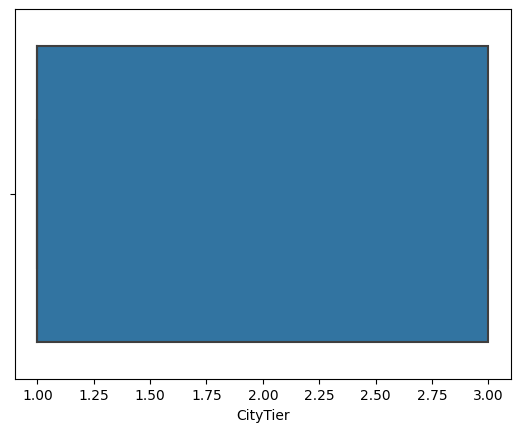

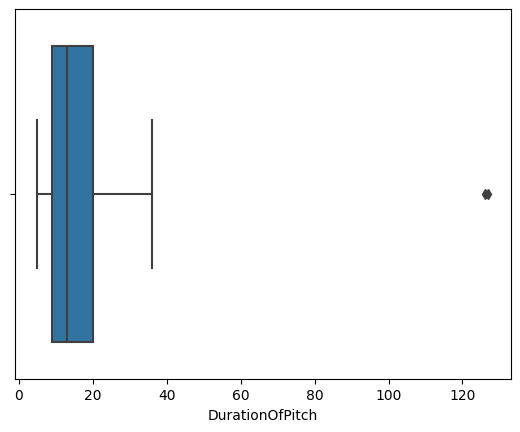

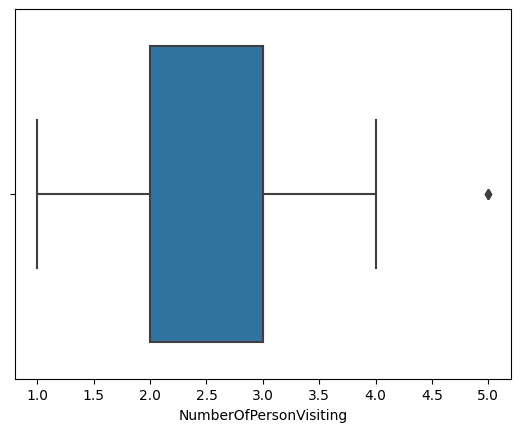

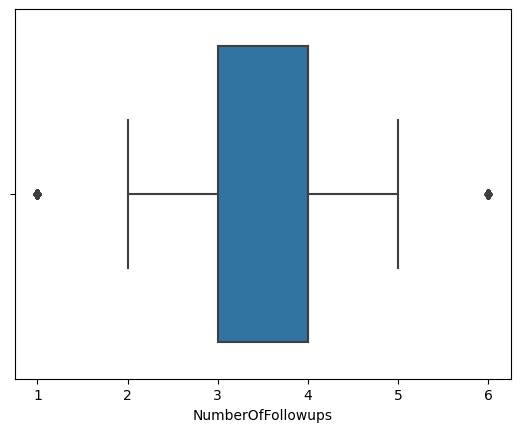

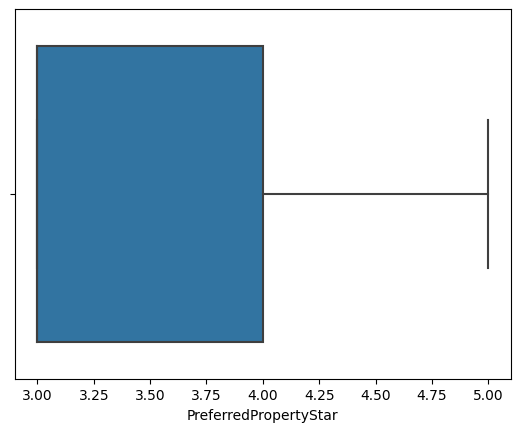

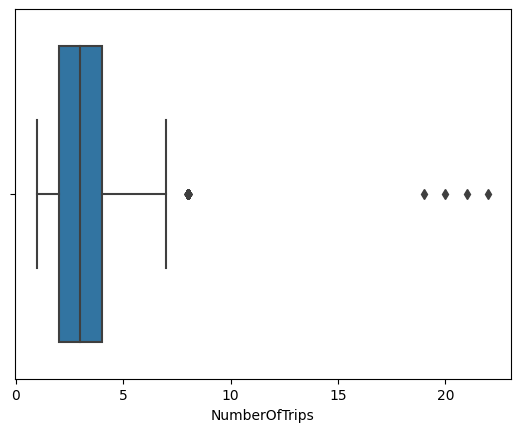

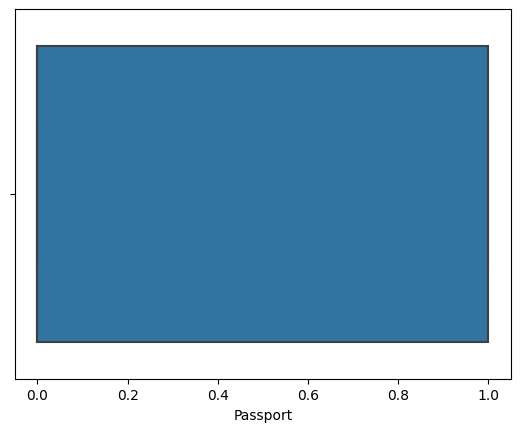

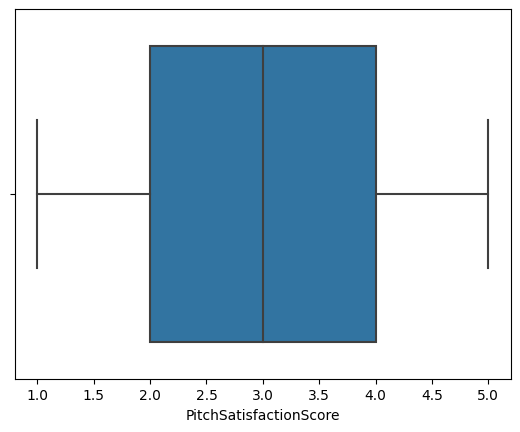

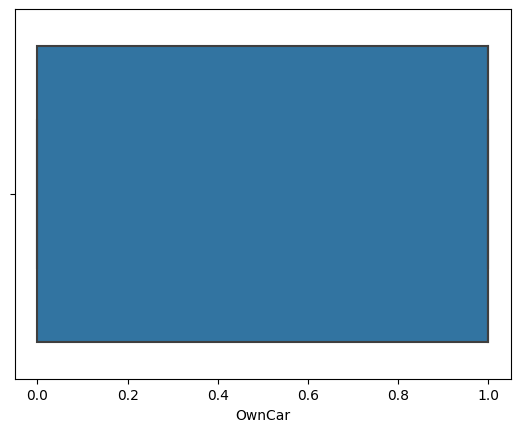

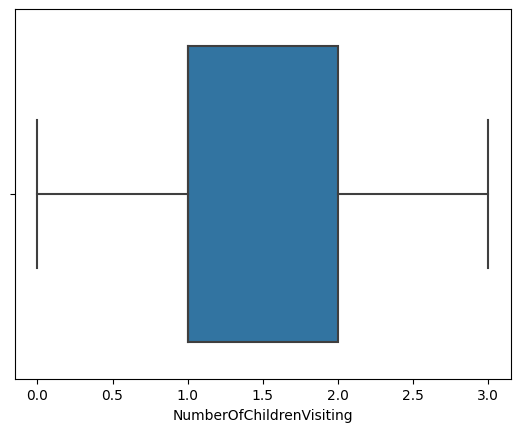

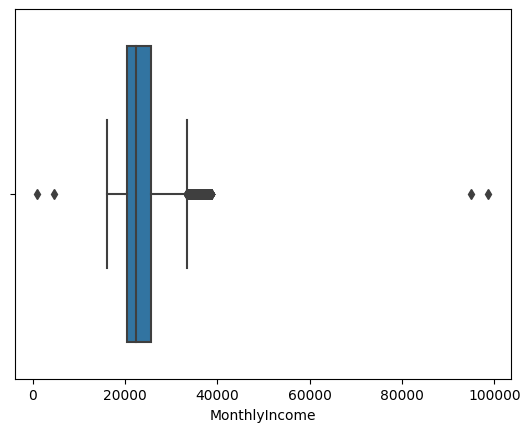

In [ ]:
df_numeric=df.select_dtypes(include='number')
df_numeric=df_numeric.drop('ProdTaken',axis=1)
for i in df_numeric.columns:
  sns.boxplot(data=df_numeric,x=df_numeric[i]);
  plt.show()
#ProdTaken,DurationOfPitch,NumberOfFollowUps,NumberOfPersonVisiting.NumberOfTrips,MonthlyIncome have outliers

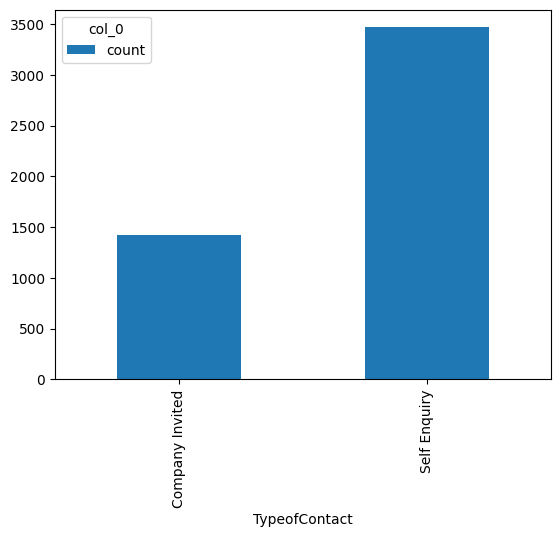

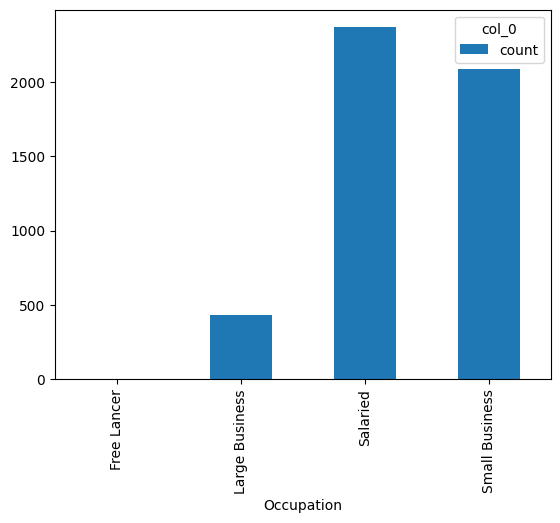

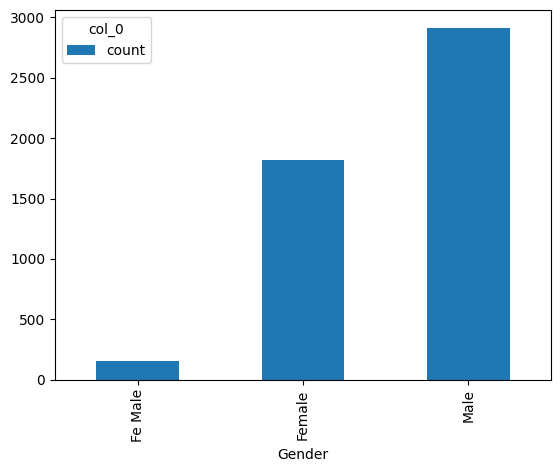

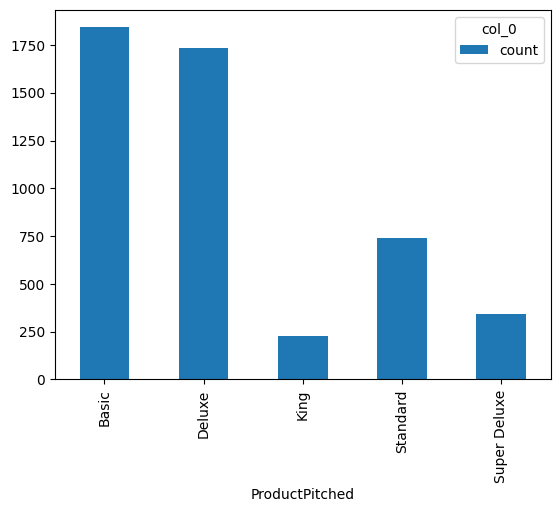

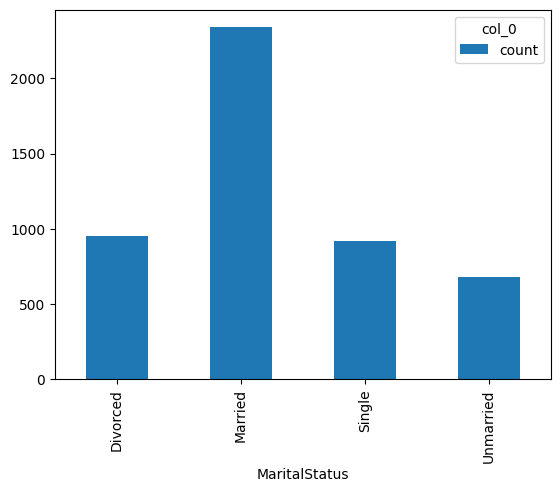

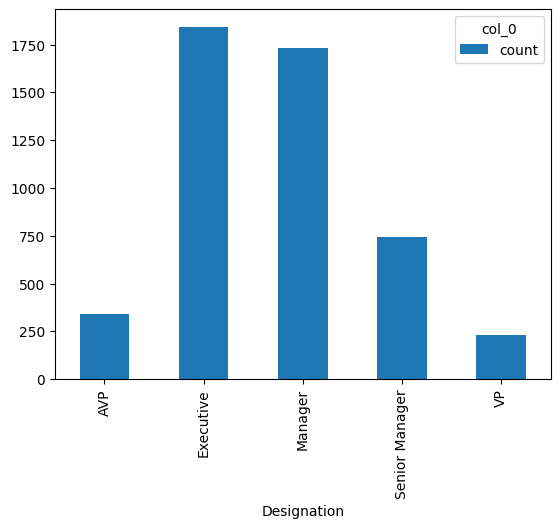

In [ ]:
for i in df_categorical.columns:
  my_tab = pd.crosstab(index = df_categorical[i],
                              columns="count");

  my_tab.plot.bar()

Q2)C)

In [ ]:
def treat_outliers(column_name):
  q1=df[column_name].quantile(0.25)
  q3=df[column_name].quantile(0.75)
  iqr=q3-q1
  upper_lim=q3+(1.5*iqr)
  lower_lim=q1-(1.5*iqr)
  for i in df[column_name]:
    if i>upper_lim:
      df[column_name].replace(i,upper_lim,inplace=True)
    if i<lower_lim:
      df[column_name].replace(i,lower_lim,inplace=True)
for i in df_numeric.columns:
  treat_outliers(i)

Q2)D)

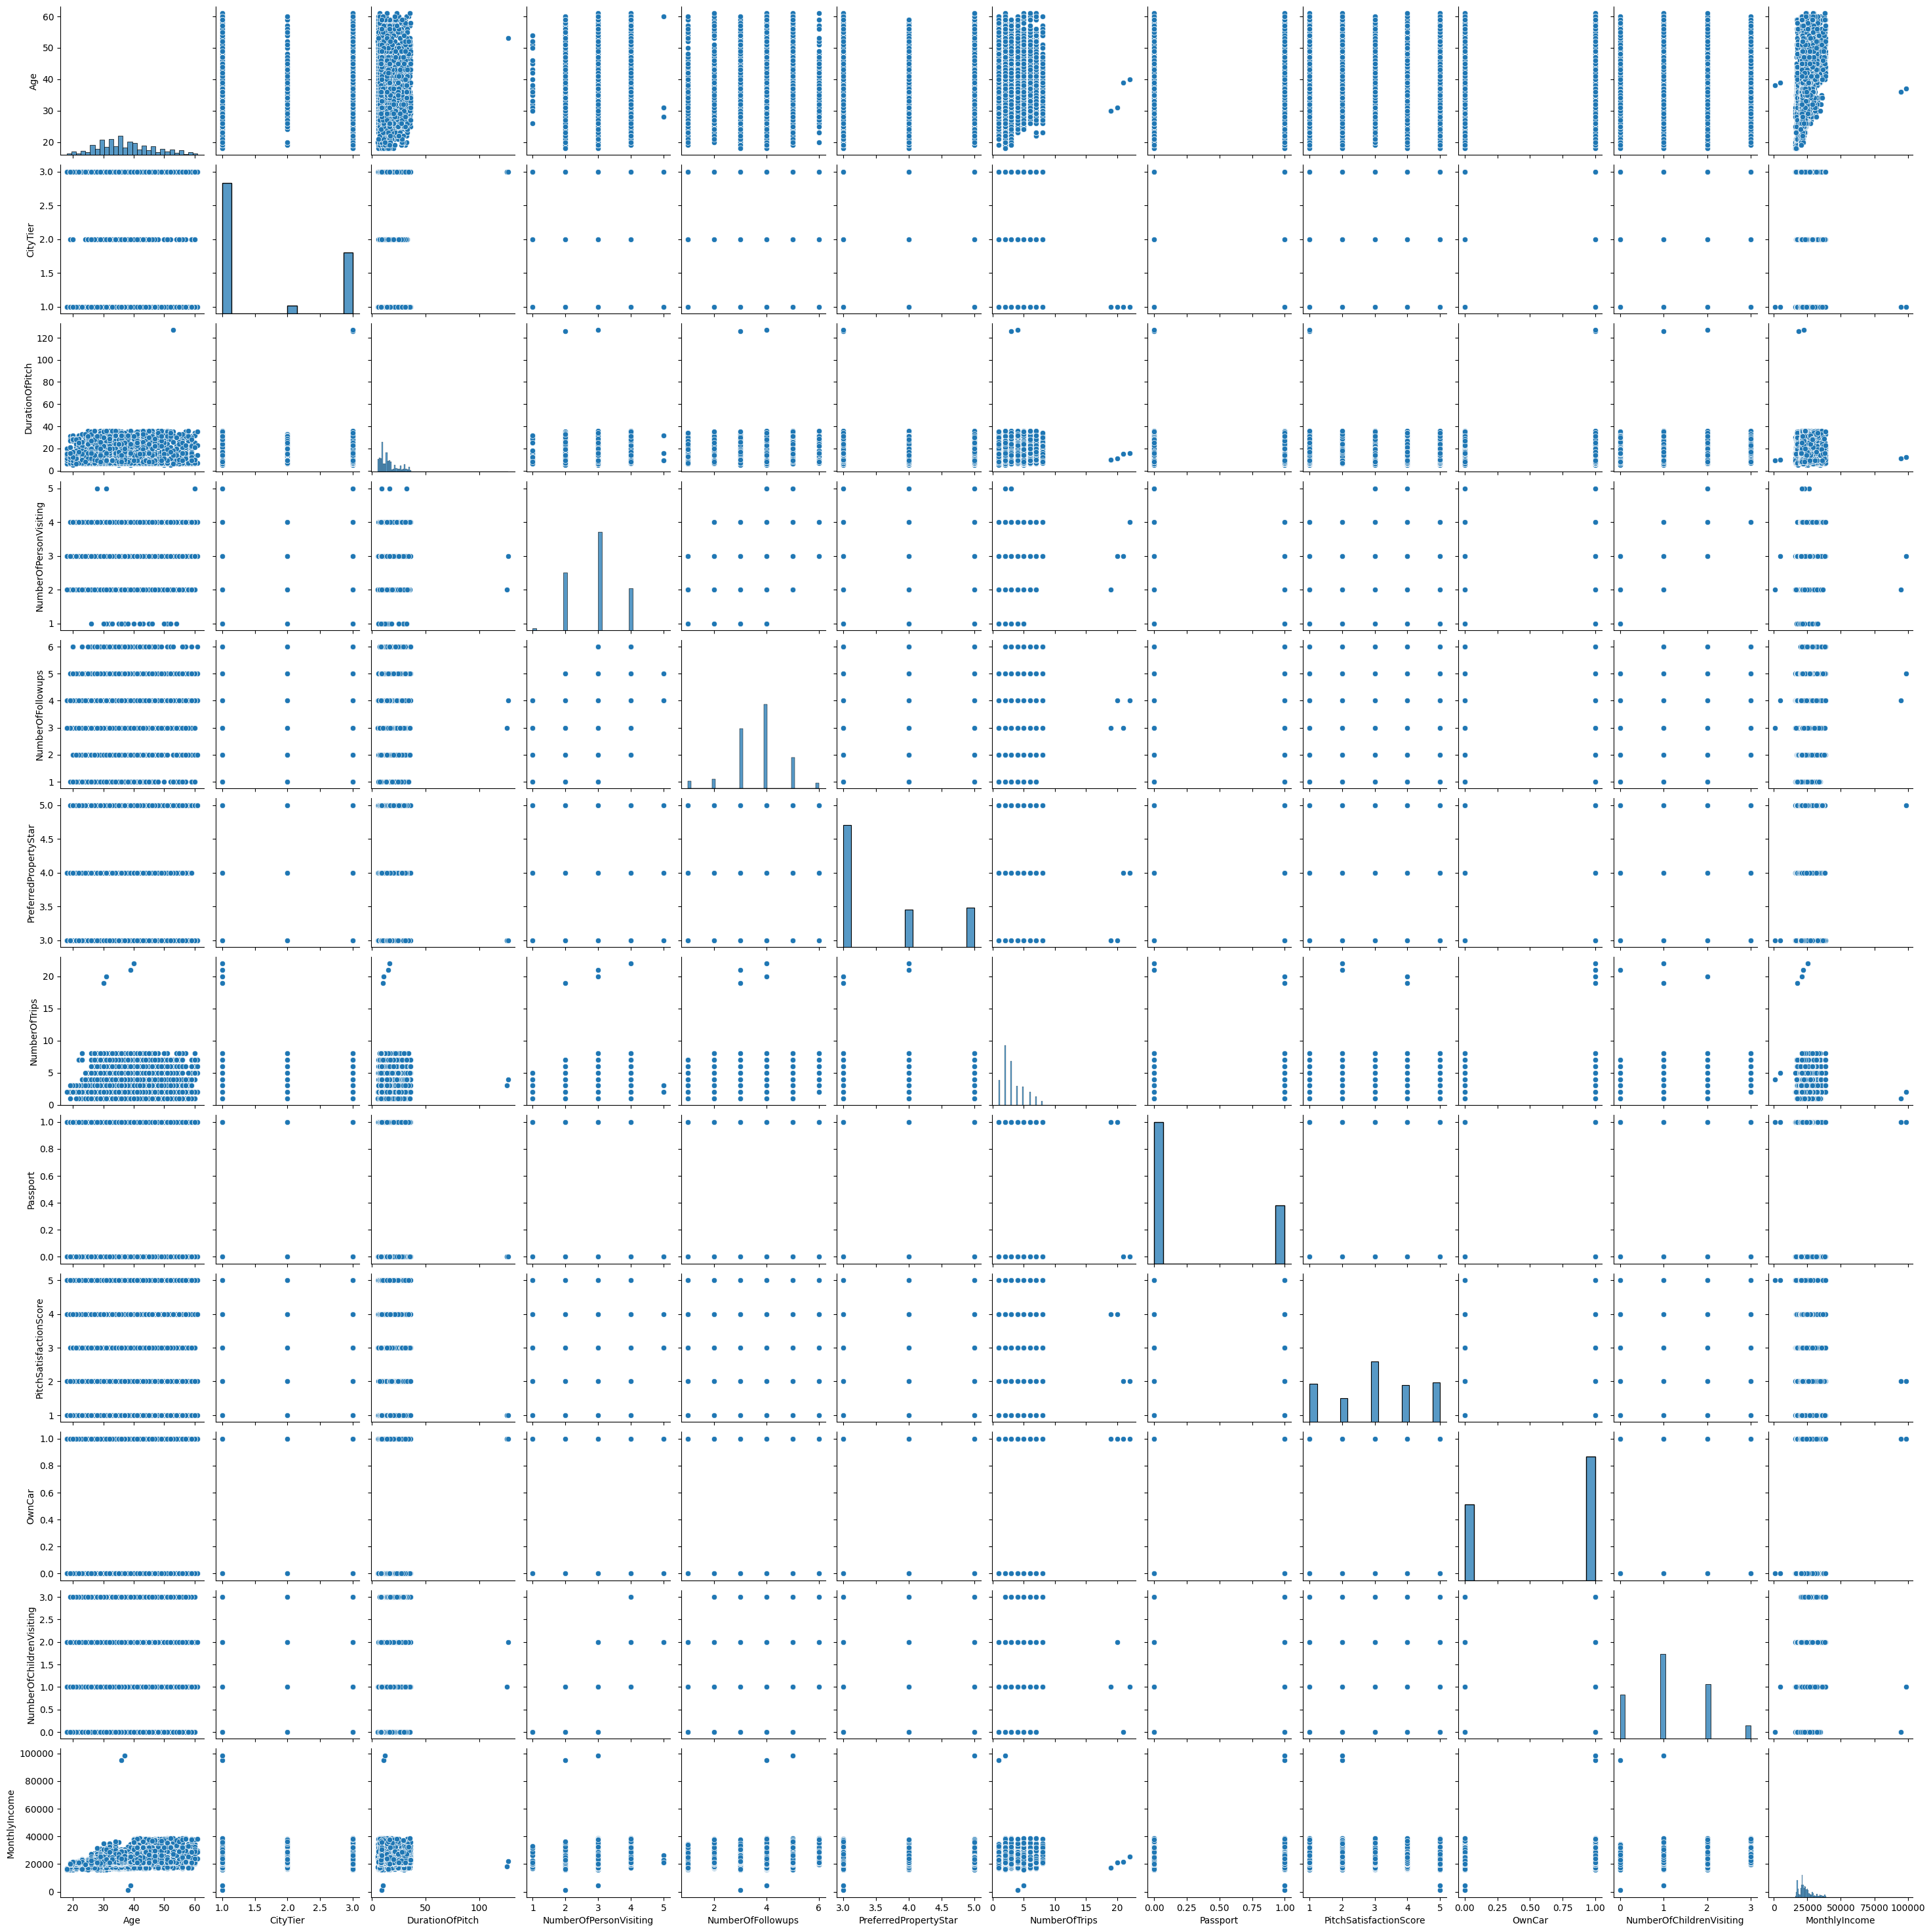

In [ ]:
sns.pairplot(data=df_numeric);

Q2)E)

In [ ]:
df_products=df.groupby('ProductPitched')
print(df_products.first())

                ProdTaken   Age  CityTier  DurationOfPitch  \
ProductPitched                                               
Basic                   1  37.0         1              8.0   
Deluxe                  1  41.0         3              6.0   
King                    0  53.0         1             11.0   
Standard                0  38.0         1             29.0   
Super Deluxe            0  53.0         3              8.0   

                NumberOfPersonVisiting  NumberOfFollowups  \
ProductPitched                                              
Basic                              3.0                4.0   
Deluxe                             3.0                3.0   
King                               2.0                3.0   
Standard                           2.0                4.0   
Super Deluxe                       3.0                4.0   

                PreferredPropertyStar  NumberOfTrips  Passport  \
ProductPitched                                                   
Basic

Q2)F)

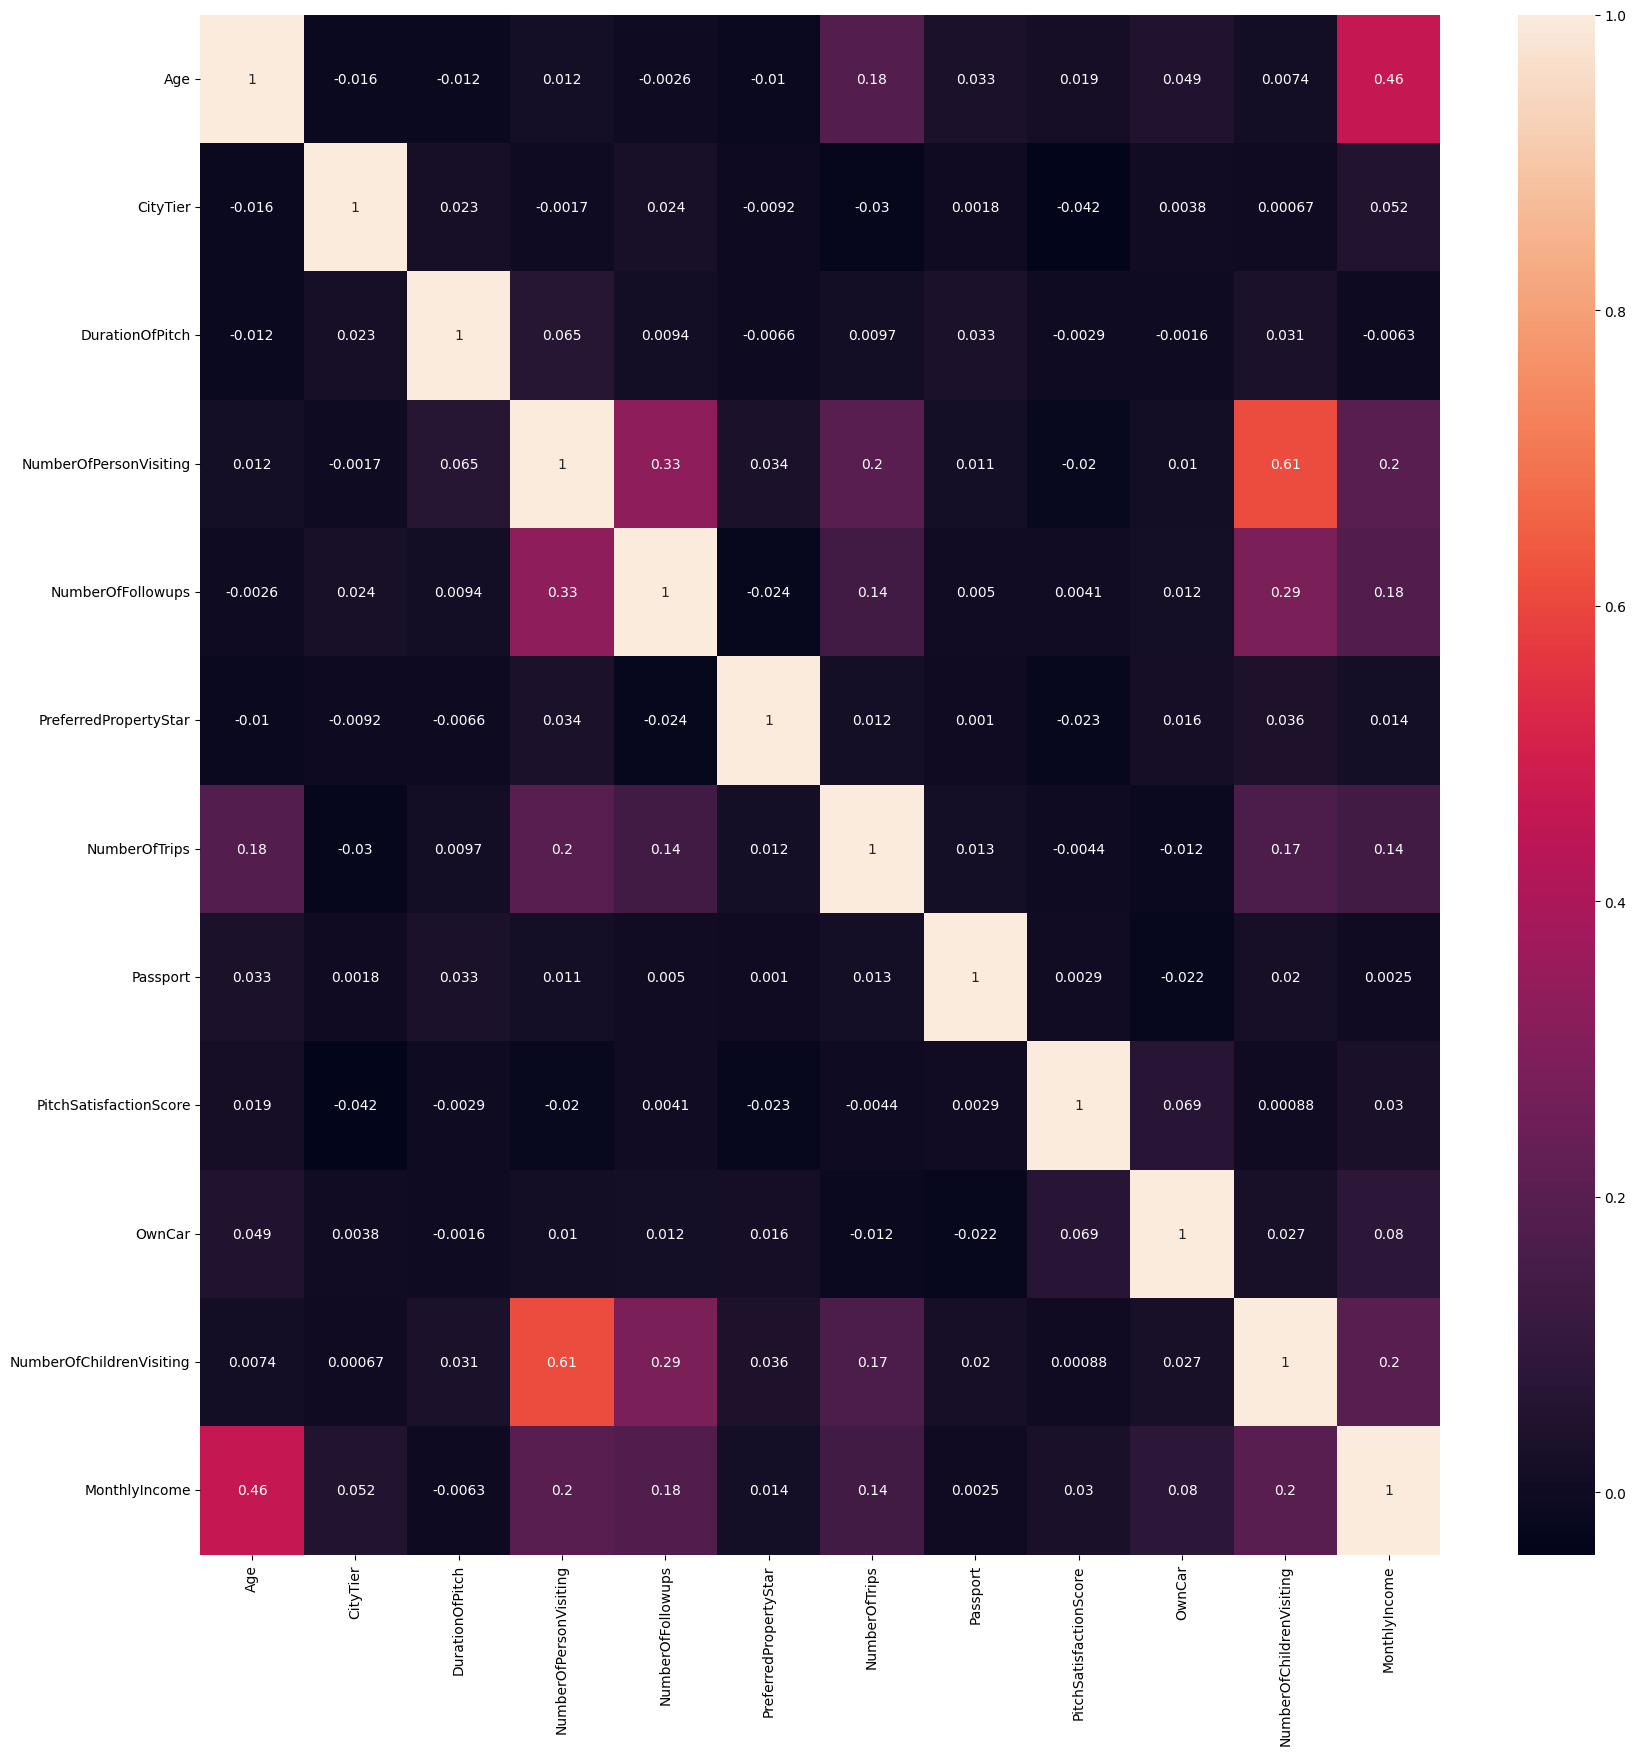

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data=df_numeric.corr(),annot=True,ax=ax);

Q3)A) and Q3)B)

In [ ]:
df=df.drop(['PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'],axis=1)
df.isnull().sum()

ProdTaken                     0
Age                         226
CityTier                      0
NumberOfPersonVisiting        0
PreferredPropertyStar        26
NumberOfTrips               140
Passport                      0
OwnCar                        0
NumberOfChildrenVisiting     66
MonthlyIncome               233
TypeofContact                 0
Occupation                    0
Gender                        0
MaritalStatus                 0
Designation                   0
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mean(),inplace=True)
df['NumberOfTrips'].fillna(df['NumberOfTrips'].mean(),inplace=True)
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mean(),inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

ProdTaken                   0
Age                         0
CityTier                    0
NumberOfPersonVisiting      0
PreferredPropertyStar       0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisiting    0
MonthlyIncome               0
TypeofContact               0
Occupation                  0
Gender                      0
MaritalStatus               0
Designation                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   float64 
 2   CityTier                  4888 non-null   int64   
 3   NumberOfPersonVisiting    4888 non-null   float64 
 4   PreferredPropertyStar     4888 non-null   float64 
 5   NumberOfTrips             4888 non-null   float64 
 6   Passport                  4888 non-null   int64   
 7   OwnCar                    4888 non-null   int64   
 8   NumberOfChildrenVisiting  4888 non-null   float64 
 9   MonthlyIncome             4888 non-null   float64 
 10  TypeofContact             4888 non-null   category
 11  Occupation                4888 non-null   category
 12  Gender                    4888 non-null   category
 13  MaritalStatus             4888 non-null   catego

In [ ]:
df['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [ ]:
X=df.copy()
y=df['ProdTaken']
X=X.drop('ProdTaken',axis=1)

Q3)C)

In [ ]:
for i in X.columns:
  if X[i].dtype!='category':
    X[i]=X[i].astype('float')
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       4888 non-null   float64 
 1   CityTier                  4888 non-null   float64 
 2   NumberOfPersonVisiting    4888 non-null   float64 
 3   PreferredPropertyStar     4888 non-null   float64 
 4   NumberOfTrips             4888 non-null   float64 
 5   Passport                  4888 non-null   float64 
 6   OwnCar                    4888 non-null   float64 
 7   NumberOfChildrenVisiting  4888 non-null   float64 
 8   MonthlyIncome             4888 non-null   float64 
 9   TypeofContact             4888 non-null   category
 10  Occupation                4888 non-null   category
 11  Gender                    4888 non-null   category
 12  MaritalStatus             4888 non-null   category
 13  Designation               4888 non-null   catego

In [ ]:
X=pd.get_dummies(X,drop_first=True)

Q3)D)

In [ ]:
print(X.shape)

(4888, 22)


In [ ]:
print(y.shape)

(4888,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

Q3)E)

In [ ]:
for i in np.arange(0.1,1.0,0.05):
  model_DT=DecisionTreeClassifier(random_state=42,ccp_alpha=i).fit(X_train,y_train)
  y_pred_DT=model_DT.predict(X_test)
  print("Alpha value: ",i)
  print('Accuracy: ',accuracy_score(y_test,y_pred_DT))
  print('Precision: ',precision_score(y_test,y_pred_DT))
  print('Recall: ',recall_score(y_test,y_pred_DT))
  print('ROC-AUC Score: ',roc_auc_score(y_test,y_pred_DT))
  #Best Accuracy of DecisionTreeClassifier out of all values of alpha is is 81.46%

Alpha value:  0.1
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.15000000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.20000000000000004
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.25000000000000006
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.30000000000000004
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.3500000000000001
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.40000000000000013


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.45000000000000007
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.5000000000000001
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.5500000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.6000000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.6500000000000001
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.7000000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.7500000000000002
Accuracy:  0.814587593728698


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.8000000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.8500000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.9000000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.9500000000000003
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [ ]:
for i in np.arange(0.1,1.0,0.05):
  model_DT=RandomForestClassifier(random_state=42,ccp_alpha=i,oob_score=True).fit(X_train,y_train)
  y_pred_DT=model_DT.predict(X_test)
  print("Alpha value: ",i)
  print('Accuracy: ',accuracy_score(y_test,y_pred_DT))
  print('Precision: ',precision_score(y_test,y_pred_DT))
  print('Recall: ',recall_score(y_test,y_pred_DT))
  print('ROC-AUC Score: ',roc_auc_score(y_test,y_pred_DT))
  #Best Accuracy of RandomForestClassifier out of all values of alpha is 81.46%

Alpha value:  0.1
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.15000000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.20000000000000004
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.25000000000000006
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.30000000000000004
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.3500000000000001
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.40000000000000013
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.45000000000000007
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.5000000000000001
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.5500000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.6000000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.6500000000000001
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.7000000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.7500000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.8000000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.8500000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.9000000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.9500000000000003
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_DT=BaggingClassifier(random_state=42,bootstrap_features=True,oob_score=True).fit(X_train,y_train)
y_pred_DT=model_DT.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred_DT))
print('Precision: ',precision_score(y_test,y_pred_DT))
print('Recall: ',recall_score(y_test,y_pred_DT))
print('ROC-AUC Score: ',roc_auc_score(y_test,y_pred_DT))
#Accuracy of BaggingClassifier is 87.18%

Alpha value:  0.1
Accuracy:  0.8718473074301295
Precision:  0.8559322033898306
Recall:  0.3713235294117647
ROC-AUC Score:  0.6785487939945853


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [ ]:
for i in np.arange(0.1,1.0,0.05):
  model_DT=AdaBoostClassifier(random_state=42,learning_rate=i).fit(X_train,y_train)
  y_pred_DT=model_DT.predict(X_test)
  print("Learning Rate: ",i)
  print('Accuracy: ',accuracy_score(y_test,y_pred_DT))
  print('Precision: ',precision_score(y_test,y_pred_DT))
  print('Recall: ',recall_score(y_test,y_pred_DT))
  print('ROC-AUC Score: ',roc_auc_score(y_test,y_pred_DT))
#Best Accuracy of AdaBoostClassifier out of all values of Alpha is 81.46%

Learning Rate:  0.1
Accuracy:  0.8214042263122018
Precision:  0.7777777777777778
Recall:  0.051470588235294115
ROC-AUC Score:  0.524061653950283
Learning Rate:  0.15000000000000002
Accuracy:  0.8268575323790047
Precision:  0.8
Recall:  0.08823529411764706
ROC-AUC Score:  0.5416071868077774
Learning Rate:  0.20000000000000004
Accuracy:  0.8289025221540559
Precision:  0.8181818181818182
Recall:  0.09926470588235294
ROC-AUC Score:  0.5471218926901305
Learning Rate:  0.25000000000000006
Accuracy:  0.8329925017041582
Precision:  0.8
Recall:  0.1323529411764706
ROC-AUC Score:  0.5624107802116662
Learning Rate:  0.30000000000000004
Accuracy:  0.8323108384458078
Precision:  0.76
Recall:  0.13970588235294118
ROC-AUC Score:  0.5648320206743785
Learning Rate:  0.3500000000000001
Accuracy:  0.8329925017041582
Precision:  0.7647058823529411
Recall:  0.14338235294117646
ROC-AUC Score:  0.5666702559684961
Learning Rate:  0.40000000000000013
Accuracy:  0.8289025221540559
Precision:  0.6779661016949152

In [ ]:
for i in np.arange(0.1,1.0,0.05):
  model_DT=GradientBoostingClassifier(random_state=42,ccp_alpha=i).fit(X_train,y_train)
  y_pred_DT=model_DT.predict(X_test)
  print("Alpha value: ",i)
  print('Accuracy: ',accuracy_score(y_test,y_pred_DT))
  print('Precision: ',precision_score(y_test,y_pred_DT))
  print('Recall: ',recall_score(y_test,y_pred_DT))
  print('ROC-AUC Score: ',roc_auc_score(y_test,y_pred_DT))
#Best Accuracy of AdaBoostClassifier out of all values of Learning Rate is 83.3%

Alpha value:  0.1
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.15000000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.20000000000000004
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.25000000000000006
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.30000000000000004
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.3500000000000001
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.40000000000000013
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.45000000000000007
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.5000000000000001
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.5500000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.6000000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.6500000000000001
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.7000000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.7500000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.8000000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.8500000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.9000000000000002
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.9500000000000003
Accuracy:  0.814587593728698
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42))
 ]
model_DT = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
 ).fit(X_train,y_train)
y_pred_DT=model_DT.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred_DT))
print('Precision: ',precision_score(y_test,y_pred_DT))
print('Recall: ',recall_score(y_test,y_pred_DT))
print('ROC-AUC Score: ',roc_auc_score(y_test,y_pred_DT))
#Accuracy of StackingClassifier is 88.34%

Accuracy:  0.8834355828220859
Precision:  0.7988165680473372
Recall:  0.4963235294117647
ROC-AUC Score:  0.7339358232832882


Q3)F)

In [ ]:
for i in np.arange(0.1,1.0,0.05):
  model_DT=XGBClassifier(base_score=0.5, booster='gbtree',
        learning_rate=i,
        reg_alpha=0,
       ).fit(X_train,y_train)
  y_pred_DT=model_DT.predict(X_test)
  print("Learning Rate: ",i)
  print('Accuracy: ',accuracy_score(y_test,y_pred_DT))
  print('Precision: ',precision_score(y_test,y_pred_DT))
  print('Recall: ',recall_score(y_test,y_pred_DT))
  print('ROC-AUC Score: ',roc_auc_score(y_test,y_pred_DT))
#Best Accuracy of XGBClassifier out of all values of learning rate is 90.25%

Learning Rate:  0.1
Accuracy:  0.8752556237218814
Precision:  0.8248175182481752
Recall:  0.41544117647058826
ROC-AUC Score:  0.69767874723111
Learning Rate:  0.15000000000000002
Accuracy:  0.880027266530334
Precision:  0.8333333333333334
Recall:  0.4411764705882353
ROC-AUC Score:  0.7105463942899336
Learning Rate:  0.20000000000000004
Accuracy:  0.8834355828220859
Precision:  0.8258064516129032
Recall:  0.47058823529411764
ROC-AUC Score:  0.7239970465173517
Learning Rate:  0.25000000000000006
Accuracy:  0.8847989093387867
Precision:  0.7976878612716763
Recall:  0.5073529411764706
ROC-AUC Score:  0.7390321191238001
Learning Rate:  0.30000000000000004
Accuracy:  0.8929788684389911
Precision:  0.8212290502793296
Recall:  0.5404411764705882
ROC-AUC Score:  0.756831466896382
Learning Rate:  0.3500000000000001
Accuracy:  0.8929788684389911
Precision:  0.8176795580110497
Recall:  0.5441176470588235
ROC-AUC Score:  0.7582512921486585
Learning Rate:  0.40000000000000013
Accuracy:  0.8943421949

Q3)G)

In [ ]:
#XGBoost has the highest accuracy of 90.25% out of all the models